<a href="https://colab.research.google.com/github/MadhurimaPaul-87/Machine_Learning/blob/main/Fashion_Mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install -U tensorflow_datasets

Requirement already up-to-date: tensorflow_datasets in /usr/local/lib/python3.7/dist-packages (4.2.0)
Requirement already up-to-date: tensorflow_datasets in /usr/local/lib/python3.7/dist-packages (4.2.0)


**Import dependencies**

In [34]:
# import tensorflow and tensorflow datasets
import tensorflow as tf
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

#import helper libraries
import math
import numpy as np
import matplotlib.pyplot as plt

#Improve progress bar display
import tqdm
import tqdm.auto
tqdm.tqdm=tqdm.auto.tqdm

In [35]:
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

**Import the Fashion Mnist dataset**

In [36]:
dataset,metadata= tfds.load('fashion_mnist',as_supervised=True,with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

In [52]:
class_names=['T-shirt/Top', 'Trouser', 'Pullover', 'Dress', 'Coat',
             'Sandal',      'Shirt',   'Sneaker',   'Bag',   'Ankle Boot']

**Explore the data**

In [38]:
num_train_examples= metadata.splits['train'].num_examples
num_test_examples= metadata.splits['test'].num_examples
print(num_train_examples)
print(num_test_examples)

60000
10000


**Preprocess the data**

In [39]:
def normalize(images, labels):
  images= tf.cast(images, float)
  images/=255
  return images, labels

train_dataset=train_dataset.map(normalize)
test_dataset=test_dataset.map(normalize)

**Explore the processed data**

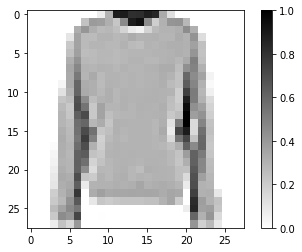

In [41]:
#Take a single image and remove the colour dimension by reshaping
for image, label in train_dataset.take(1):
  break
image = image.numpy().reshape((28,28))

#Plot the image
plt.figure()
plt.imshow(image,cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()


**Display the first 25 images with labels from train dataset**

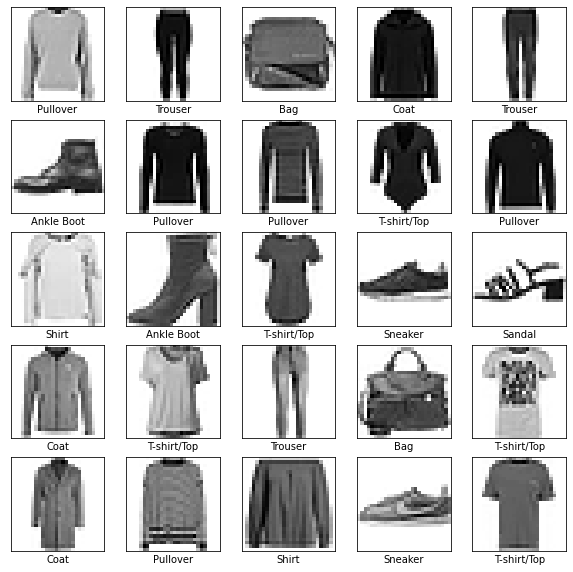

In [53]:
plt.figure(figsize=(10,10))
i = 0
for (image, label) in train_dataset.take(25):
    image = image.numpy().reshape((28,28))
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel(class_names[label])
    i += 1
plt.show()

**Build the model**

In [54]:
model= tf.keras.Sequential([
       tf.keras.layers.Flatten(input_shape=(28,28,1)),
       tf.keras.layers.Dense(units=128,activation=tf.nn.relu),
       tf.keras.layers.Dense(units=10,activation=tf.nn.softmax)
                         ])

**Compile the model**

In [55]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

**Train the model**

In [56]:
BATCH_SIZE=32
train_dataset=train_dataset.repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset= test_dataset.batch(BATCH_SIZE)

In [57]:
model.fit(train_dataset,epochs=5,steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

Epoch 1/5
1875/1875 [==============================] - 11s 3ms/step - loss: 0.6296 - accuracy: 0.7794
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3840 - accuracy: 0.8599
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3346 - accuracy: 0.8800
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3123 - accuracy: 0.8873
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2967 - accuracy: 0.8898


**Evaluate Accuracy**

In [59]:
test_loss,test_accuracy=model.evaluate(test_dataset,steps=math.ceil(num_test_examples/32))
test_accuracy

313/313 [==============================] - 1s 4ms/step - loss: 0.3794 - accuracy: 0.8591


0.8590999841690063

**Make predictions and explore**

In [60]:
for test_images, test_labels in test_dataset.take(1):
  test_images=test_images.numpy()
  test_labels=test_labels.numpy()
  prediction=model.predict(test_images)

In [61]:
prediction.shape

(32, 10)

In [62]:
prediction[0]

array([1.4245065e-04, 2.7430519e-06, 4.4776343e-02, 5.0649724e-06,
       8.7012434e-01, 7.1433237e-07, 8.4912166e-02, 1.3079898e-10,
       3.6091711e-05, 1.3702017e-07], dtype=float32)

In [63]:
np.argmax(prediction[0])

4

In [64]:
test_labels[0]

4